In [33]:
import pandas as pd
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

In [34]:
weather = pd.read_csv('weather_features.csv',header='infer')


In [35]:
#Pre-processign REMOVE INNECESARY DATA --> temp_max, temp_min, weather_id, weather_icon,
weather = weather.drop(columns=['weather_id', 'weather_icon'], axis = 1)
weather

,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main,weather_description
0,2015-01-01 00:00:00+01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
1,2015-01-01 01:00:00+01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
2,2015-01-01 02:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
3,2015-01-01 03:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
4,2015-01-01 04:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,1028,54,3,30,0.0,0.0,0.0,0,clear,sky is clear
178392,2018-12-31 20:00:00+01:00,Seville,285.760,1029,62,3,30,0.0,0.0,0.0,0,clear,sky is clear
178393,2018-12-31 21:00:00+01:00,Seville,285.150,1028,58,4,50,0.0,0.0,0.0,0,clear,sky is clear
178394,2018-12-31 22:00:00+01:00,Seville,284.150,1029,57,4,60,0.0,0.0,0.0,0,clear,sky is clear


In [36]:
df = pd.DataFrame(weather)

In [37]:
#REDONDEAR y CAMBIAR A CELSIUS
df['temp'] = df['temp'] - 273.15
df['temp'] = df['temp'].round(1)
print(df)

                           dt_iso city_name  temp  pressure  humidity  \
0       2015-01-01 00:00:00+01:00  Valencia  -2.7      1001        77   
1       2015-01-01 01:00:00+01:00  Valencia  -2.7      1001        77   
2       2015-01-01 02:00:00+01:00  Valencia  -3.5      1002        78   
3       2015-01-01 03:00:00+01:00  Valencia  -3.5      1002        78   
4       2015-01-01 04:00:00+01:00  Valencia  -3.5      1002        78   
...                           ...       ...   ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  14.6      1028        54   
178392  2018-12-31 20:00:00+01:00   Seville  12.6      1029        62   
178393  2018-12-31 21:00:00+01:00   Seville  12.0      1028        58   
178394  2018-12-31 22:00:00+01:00   Seville  11.0      1029        57   
178395  2018-12-31 23:00:00+01:00   Seville  10.8      1029        70   

        wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0                1        62      0.0      0.0      

In [38]:
#DIRECCION DEL AIRE

limites = [0, 45, 90, 135, 180, 225, 270, 315, 360]
etiquetas = ['N', 'NW', 'W', 'SW', 'S', 'SO', 'O', 'NO']  # Etiquetas para cada intervalo

# Utilizar pd.cut() para asignar etiquetas a los intervalos
df['wind_deg'] = pd.cut(df['wind_deg'], bins=limites, labels=etiquetas, right=False)



                           dt_iso city_name  temp  pressure  humidity  \
0       2015-01-01 00:00:00+01:00  Valencia  -2.7      1001        77   
1       2015-01-01 01:00:00+01:00  Valencia  -2.7      1001        77   
2       2015-01-01 02:00:00+01:00  Valencia  -3.5      1002        78   
3       2015-01-01 03:00:00+01:00  Valencia  -3.5      1002        78   
4       2015-01-01 04:00:00+01:00  Valencia  -3.5      1002        78   
...                           ...       ...   ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  14.6      1028        54   
178392  2018-12-31 20:00:00+01:00   Seville  12.6      1029        62   
178393  2018-12-31 21:00:00+01:00   Seville  12.0      1028        58   
178394  2018-12-31 22:00:00+01:00   Seville  11.0      1029        57   
178395  2018-12-31 23:00:00+01:00   Seville  10.8      1029        70   

        wind_speed wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0                1       NW      0.0      0.0      0.

In [40]:
#RENAME
df.rename(columns={'wind_deg': 'wind_dir'}, inplace=True)
# Mostrar el DataFrame con la nueva columna de direcciones
print(df)

                           dt_iso city_name  temp  pressure  humidity  \
0       2015-01-01 00:00:00+01:00  Valencia  -2.7      1001        77   
1       2015-01-01 01:00:00+01:00  Valencia  -2.7      1001        77   
2       2015-01-01 02:00:00+01:00  Valencia  -3.5      1002        78   
3       2015-01-01 03:00:00+01:00  Valencia  -3.5      1002        78   
4       2015-01-01 04:00:00+01:00  Valencia  -3.5      1002        78   
...                           ...       ...   ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  14.6      1028        54   
178392  2018-12-31 20:00:00+01:00   Seville  12.6      1029        62   
178393  2018-12-31 21:00:00+01:00   Seville  12.0      1028        58   
178394  2018-12-31 22:00:00+01:00   Seville  11.0      1029        57   
178395  2018-12-31 23:00:00+01:00   Seville  10.8      1029        70   

        wind_speed wind_dir  rain_1h  rain_3h  snow_3h  clouds_all  \
0                1       NW      0.0      0.0      0.

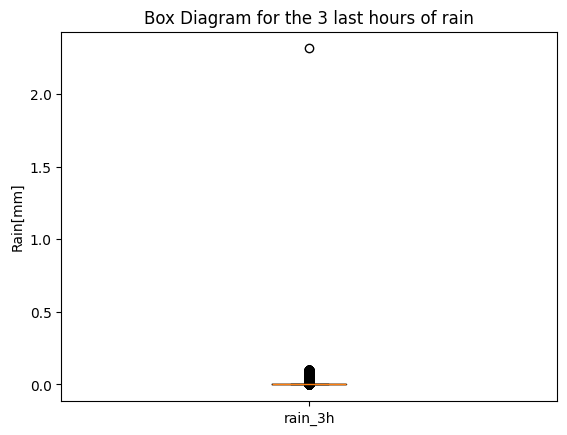

In [44]:
# Crear el diagrama de caja
fig, ax = plt.subplots()
ax.boxplot(df['rain_3h'])

# Agregar etiquetas y título
ax.set_xticklabels(['rain_3h'])
ax.set_ylabel('Rain[mm]')
ax.set_title('Box Diagram for the 3 last hours of rain')

# Mostrar el diagrama de caja
plt.show()

In [ ]:
weather.plot.scatter(x='temp',y='temp_min')